In [19]:
import pandas as pd
import plotly.express as plx
import datetime as dt
from IPython.core.display import display, HTML

/var/folders/xd/_xhxvsqj3px3y07fpzdrncmh0000gn/T/ipykernel_792/1130342455.py:4: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [20]:
data_mnk = pd.read_csv("monkey_pox_cases.csv")
data_mnk.head()
data_mnk

,DateRep,CountryExp,CountryCode,Source,ConfCases
0,2022-04-25,Austria,AT,EI,0
1,2022-04-25,Belgium,BE,TESSy,0
2,2022-04-25,Bulgaria,BG,TESSy,0
3,2022-04-25,Croatia,HR,TESSy,0
4,2022-04-25,Czechia,CZ,TESSy,0
...,...,...,...,...,...
1815,2022-07-07,Portugal,PT,EI,0
1816,2022-07-07,Romania,RO,TESSy,0
1817,2022-07-07,Slovenia,SI,EI,2
1818,2022-07-07,Spain,ES,TESSy,0


In [21]:
data_mnk["DateRep"] = data_mnk["DateRep"].astype('datetime64[ns]') #convert daterep column to datetime format
data_mnk["Year"] = data_mnk["DateRep"].dt.to_period("Y") #create year column
data_mnk["Month"] = data_mnk["DateRep"].dt.month


In [22]:
data_mnk.head()

,DateRep,CountryExp,CountryCode,Source,ConfCases,Year,Month
0,2022-04-25,Austria,AT,EI,0,2022,4
1,2022-04-25,Belgium,BE,TESSy,0,2022,4
2,2022-04-25,Bulgaria,BG,TESSy,0,2022,4
3,2022-04-25,Croatia,HR,TESSy,0,2022,4
4,2022-04-25,Czechia,CZ,TESSy,0,2022,4


Bar plot for each continent total cases

In [23]:
data_mnk.head()

,DateRep,CountryExp,CountryCode,Source,ConfCases,Year,Month
0,2022-04-25,Austria,AT,EI,0,2022,4
1,2022-04-25,Belgium,BE,TESSy,0,2022,4
2,2022-04-25,Bulgaria,BG,TESSy,0,2022,4
3,2022-04-25,Croatia,HR,TESSy,0,2022,4
4,2022-04-25,Czechia,CZ,TESSy,0,2022,4


<AxesSubplot:>

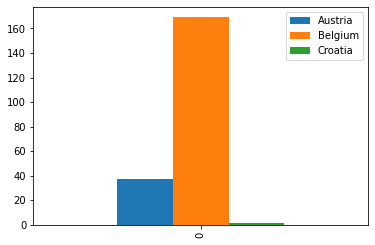

In [24]:

austria = data_mnk[data_mnk["CountryExp"] == "Austria"].ConfCases.sum()
belg = data_mnk[data_mnk["CountryExp"] == "Belgium"].ConfCases.sum()
Croatia = data_mnk[data_mnk["CountryExp"] == "Croatia"].ConfCases.sum()

bar_plt = pd.DataFrame([[austria,belg,Croatia]], columns=["Austria", "Belgium","Croatia"])
bar_plt.plot(kind="bar")

In [25]:
count_data = data_mnk.groupby(["CountryExp"])[["ConfCases"]].sum()
count_data.reset_index(inplace=True)

count_data = count_data.sort_values("ConfCases", ascending=False)


fig = plx.bar(count_data,
               y="CountryExp",
               x="ConfCases",
               orientation="h",
               title="Total Monkecases"
               )
fig.show()

In [26]:
death_df = pd.read_csv("time_series_covid19_death_global.csv", sep=",")
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv", sep=",")
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv", sep=",")

In [27]:
confirmed_df_selected = confirmed_df[["Country/Region","Lat","Long", "07/08/2022"]]
confirmed_df_selected = confirmed_df_selected.rename(columns = {"07/08/2022": "Total_Confirmed_cases"})

death_df_selected = death_df[["Country/Region","Lat","Long", "07/08/2022"]]
death_df_selected = death_df_selected.rename(columns = {"07/08/2022": "Total_Death"})

recovered_df_selected = recovered_df[["Country/Region","Lat","Long", "07/08/2022"]]
recovered_df_selected = recovered_df_selected.rename(columns = {"07/08/2022": "Total_Recovered"})

In [28]:
Country_data = pd.merge(pd.merge(confirmed_df_selected,recovered_df_selected, 
                        on = ["Country/Region", "Lat","Long"]),
                        death_df_selected, on = ["Country/Region", "Lat","Long"] )

print(Country_data.head())

del(recovered_df_selected,confirmed_df_selected,death_df_selected)

  Country/Region      Lat      Long  Total_Confirmed_cases  Total_Recovered  \
0     Antarctica -71.9499   23.3470                     11                0   
1    New Zealand -40.9006  174.8860                1422178                0   
2      Argentina -38.4161  -63.6167                9394326                0   
3          Chile -35.6751  -71.5430                4065878                0   
4        Uruguay -32.5228  -55.7658                 962251                0   

   Total_Death  
0            0  
1         1602  
2       129109  
3        58757  
4         7351  


In [87]:
Country_data = Country_data.reset_index()
Country_data.head()

,index,country/region,lat,long,total_confirmed_cases,total_recovered,total_death
0,0,Antarctica,-71.9499,23.3470,11,0,0
1,1,New Zealand,-40.9006,174.8860,1422178,0,1602
2,2,Argentina,-38.4161,-63.6167,9394326,0,129109
3,3,Chile,-35.6751,-71.5430,4065878,0,58757
4,4,Uruguay,-32.5228,-55.7658,962251,0,7351


In [89]:
selected = Country_data[Country_data["country/region"] == 'Kenya']

# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(selected["total_confirmed_cases"]) +"</span>" #+
  #           "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(selected["total_death"]) + "</span>"+
 #            "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(selected["total_recovered"]) + "</span>"+
 #            "</div>"
            )
       )

In [75]:


fig = plx.bar(data2,
               x="country/region",
               y="total_confirmed_cases",
               orientation="v",
               title="Total COVID Cases"
               )
fig.show()

In [30]:
#data cleanup

data = [Country_data, confirmed_df, recovered_df, death_df]

for d in data:
    d.columns = map(str.lower, d.columns)
    d = d.rename(columns= {"country/region": "country"})

Country_data.head()

,country/region,lat,long,total_confirmed_cases,total_recovered,total_death
0,Antarctica,-71.9499,23.3470,11,0,0
1,New Zealand,-40.9006,174.8860,1422178,0,1602
2,Argentina,-38.4161,-63.6167,9394326,0,129109
3,Chile,-35.6751,-71.5430,4065878,0,58757
4,Uruguay,-32.5228,-55.7658,962251,0,7351


In [33]:
confirmed_total = Country_data["total_confirmed_cases"].sum()
deaths_total = Country_data["total_death"].sum()
recovered_total = Country_data["total_recovered"].sum()



# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>"
            )
       )